<a href="https://colab.research.google.com/github/HRJ369/CL249--Computational-Lab/blob/main/assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Define the cubic equation
def cubic_eq(T):
    return T**3 - 581*T**2 - 8870*T - 29800

# Bisection method implementation
def bisection_method(func, a, b, tol=1e-6, max_iterations=1000):
    if func(a) * func(b) >= 0:
        print("Bisection method fails.")
        return None

    # Iteratively narrow down the root
    iteration = 0
    while (b - a) / 2.0 > tol and iteration < max_iterations:
        midpoint = (a + b) / 2.0
        if func(midpoint) == 0:  # Found exact root
            return midpoint
        elif func(a) * func(midpoint) < 0:  # Root is in left half
            b = midpoint
        else:  # Root is in right half
            a = midpoint
        iteration += 1

    return (a + b) / 2.0  # Return the midpoint as the root

# Set the initial interval [a, b] where the root is expected
a = 298  # Lower bound of temperature guess
b = 600  # Upper bound of temperature guess

# Find the root using the bisection method
equilibrium_temperature = bisection_method(cubic_eq, a, b)

if equilibrium_temperature is not None:
    print(f"The equilibrium temperature is: {equilibrium_temperature:.6f} K")


The equilibrium temperature is: 595.967269 K


In [14]:
import numpy as np

# Given matrix M and vector Y
M = np.array([[1, 4, 2, 3],
              [0, 1, 4, 4],
              [-1, 0, 1, 0],
              [2, 0, 4, 1]])

Y = np.array([1, 2, 3, 4])

# Calculate the inverse of M
M_inv = np.linalg.inv(M)

# Multiply M_inv with Y to find the vector X (A, B, C, D)
X = np.dot(M_inv, Y)

# Assign the constants A, B, C, D
A, B, C, D = X

# Given parameters
P_o = 1  # Initial pressure in atm
rho = 0.8  # Gas density in kg/m^3

# Calculate the pressure drop using the Ergun equation
def pressure_drop(A, B, C, D, rho):
    # Solving for ΔP = P_o - P
    delta_P = A * rho + B * P_o**2 + C * P_o**(-2) + D * P_o**(-1)
    return delta_P

# Final pressure P at the reactor outlet
delta_P = pressure_drop(A, B, C, D, rho)
P = P_o - delta_P

print(f"The constants are: A = {A:.6f}, B = {B:.6f}, C = {C:.6f}, D = {D:.6f}")
print(f"The final pressure at the reactor outlet is: {P:.6f} atm")


The constants are: A = -1.061538, B = 0.769231, C = 1.938462, D = -1.630769
The final pressure at the reactor outlet is: 0.772308 atm


In [13]:
# Given data
l_values = [0.1, 0.2, 0.3, 0.6, 0.9, 1]  # Length values in meters
a_values = [4, 1, 4, 0.5, 1, 3]          # Corresponding 'a' values

# Number of intervals
n = len(l_values) - 1

# Calculate epsilon using the trapezoidal rule
epsilon = 0.0
for i in range(n):
    # Calculate width of each trapezoid
    width = l_values[i + 1] - l_values[i]
    # Calculate the area of each trapezoid and accumulate
    epsilon += 0.5 * (a_values[i] + a_values[i + 1]) * width

print(f"The value of epsilon (ε) is: {epsilon:.4f} (unitless)")


The value of epsilon (ε) is: 1.6000 (unitless)


Rate constant at equilibrium temperature 595.967 K: 25.13 1/s


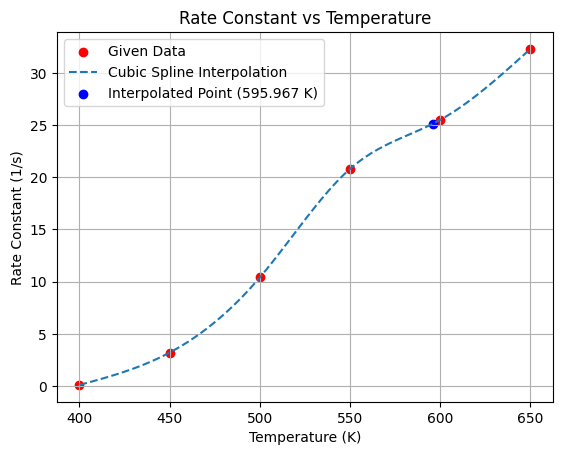

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
temperature = np.array([400, 450, 500, 550, 600, 650])  # Temperature in K
rate_constant = np.array([0.1, 3.2, 10.4, 20.8, 25.5, 32.3])  # Rate constant in 1/s

# Number of data points
n = len(temperature)

# Step 1: Calculate h[i] = x[i+1] - x[i]
h = np.diff(temperature)

# Step 2: Set up the system of equations to solve for spline coefficients
A = np.zeros((n, n))
b = np.zeros(n)

# Natural spline boundary conditions
A[0, 0] = 1
A[-1, -1] = 1

# Fill the matrix A and vector b for the inner points
for i in range(1, n - 1):
    A[i, i - 1] = h[i - 1]
    A[i, i] = 2 * (h[i - 1] + h[i])
    A[i, i + 1] = h[i]
    b[i] = 3 * ((rate_constant[i + 1] - rate_constant[i]) / h[i] - (rate_constant[i] - rate_constant[i - 1]) / h[i - 1])

# Step 3: Solve for c (second derivatives)
c = np.linalg.solve(A, b)

# Step 4: Calculate the coefficients a, b, d for each interval
a = rate_constant[:-1]
b_coef = np.zeros(n - 1)
d = np.zeros(n - 1)

for i in range(n - 1):
    b_coef[i] = (rate_constant[i + 1] - rate_constant[i]) / h[i] - (h[i] * (2 * c[i] + c[i + 1])) / 3
    d[i] = (c[i + 1] - c[i]) / (3 * h[i])

# Function to evaluate the cubic spline at a given temperature
def cubic_spline(x):
    # Find the interval x is in
    for i in range(n - 1):
        if temperature[i] <= x <= temperature[i + 1]:
            dx = x - temperature[i]
            return a[i] + b_coef[i] * dx + c[i] * dx**2 + d[i] * dx**3
    return None

# Equilibrium temperature for which you want to find the rate constant
equilibrium_temperature = 595.967  # example value, you can change it as required
equilibrium_rate_constant = cubic_spline(equilibrium_temperature)

# Print the result
print(f"Rate constant at equilibrium temperature {equilibrium_temperature} K: {equilibrium_rate_constant:.2f} 1/s")

# Optional: Plot the given data and the interpolation
temp_fine = np.linspace(400, 650, 100)
rate_fine = [cubic_spline(x) for x in temp_fine]

plt.scatter(temperature, rate_constant, color='red', label='Given Data')
plt.plot(temp_fine, rate_fine, label='Cubic Spline Interpolation', linestyle='--')
plt.scatter(equilibrium_temperature, equilibrium_rate_constant, color='blue', label=f'Interpolated Point ({equilibrium_temperature} K)')
plt.xlabel('Temperature (K)')
plt.ylabel('Rate Constant (1/s)')
plt.title('Rate Constant vs Temperature')
plt.legend()
plt.grid()
plt.show()


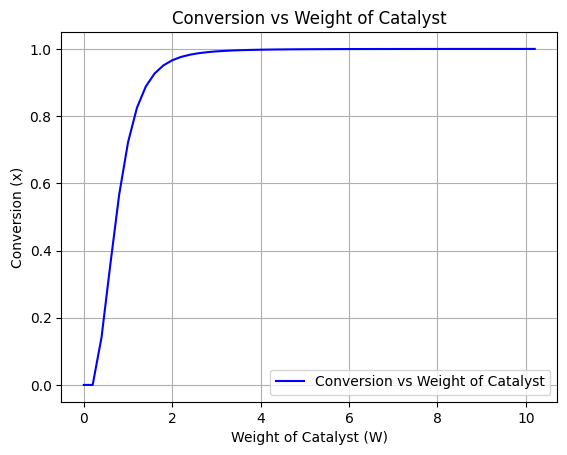

Equilibrium conversion: 1.00
Maximum efficient catalyst loading: 10.20 kg


"\nPseudo-code for solving the differential equation:\n\n1. Initialize given parameters:\n   - F_A0, k, C_A0, epsilon, P, P_0, T_0, T\n2. Set initial conditions:\n   - W = 0, x = 0\n   - Step size h = 0.2\n3. Create lists to store W and x values\n4. While W < W_max:\n   - Compute dx/dW using the function f(W, x)\n   - Update x using Euler's method: x_new = x + h * f(W, x)\n   - Update W: W = W + h\n   - Append new W and x values to lists\n5. Plot Conversion (x) vs Weight of Catalyst (W)\n6. Print equilibrium conversion and maximum efficient catalyst loading\n"

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
F_A0 = 1  # Flow rate (mol/s)
C_A0 = 0.5  # Initial concentration of A (mol/L)
P_0 = 1  # Initial pressure (atm)
T_0 = 298  # Initial temperature in K
T = 595  # Reaction temperature in K
P = 0.366  # Reaction pressure (atm)
k = 25.05  # Rate constant (L/mol·s)
epsilon = 1.6  # Effectiveness factor

# ODE as defined: dx/dW = f(W, x)
def f(W, x):
    term1 = (W / (1 + W**2))
    term2 = k * C_A0 * epsilon * (1 - x) * (P / P_0) * (T_0 / T)
    return (term1 * term2) / F_A0

# Initial conditions
W_0 = 0
x_0 = 0  # Initial conversion
step_size = 0.2  # Step size for Euler's method
W_max = 10  # Maximum weight of the catalyst

# Arrays to store W and x values
W_values = [W_0]
x_values = [x_0]

# Euler method to solve the ODE
W = W_0
x = x_0

while W < W_max:
    x_new = x + step_size * f(W, x)
    W += step_size
    W_values.append(W)
    x_values.append(x_new)
    x = x_new

# Plot Conversion vs Weight of Catalyst
plt.plot(W_values, x_values, label='Conversion vs Weight of Catalyst', color='blue')
plt.xlabel('Weight of Catalyst (W)')
plt.ylabel('Conversion (x)')
plt.title('Conversion vs Weight of Catalyst')
plt.grid()
plt.legend()
plt.show()

# a. Plot already done
# b. Finding equilibrium conversion (when dx/dW ≈ 0)
equilibrium_conversion = x_values[-1]
print(f"Equilibrium conversion: {equilibrium_conversion:.2f}")

# c. Corresponding maximum efficient catalyst loading
max_efficient_loading = W_values[-1]
print(f"Maximum efficient catalyst loading: {max_efficient_loading:.2f} kg")

# d. Pseudo-code for solving ODE using Euler method
'''
Pseudo-code for solving the differential equation:

1. Initialize given parameters:
   - F_A0, k, C_A0, epsilon, P, P_0, T_0, T
2. Set initial conditions:
   - W = 0, x = 0
   - Step size h = 0.2
3. Create lists to store W and x values
4. While W < W_max:
   - Compute dx/dW using the function f(W, x)
   - Update x using Euler's method: x_new = x + h * f(W, x)
   - Update W: W = W + h
   - Append new W and x values to lists
5. Plot Conversion (x) vs Weight of Catalyst (W)
6. Print equilibrium conversion and maximum efficient catalyst loading
'''

